In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
import pandas as pd

dataset = "diabetes2.csv"
df = pd.read_csv(dataset)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [4]:
import pandas as pd

dataset = pd.read_csv('diabetes2.csv')
dataset['Outcome'] = dataset['Outcome'].map({0: 'ND', 1: 'D'})
outcome_counts = dataset['Outcome'].value_counts()
print(outcome_counts)


ND    500
D     268
Name: Outcome, dtype: int64


In [5]:
x = dataset.iloc[:, 2:20].values  # Select columns 2 to 19 (adjust as needed)
y = dataset['Outcome'].values  # Assuming 'Outcome' is your target variable

# Print the shape of x and y for verification
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (768, 7)
Shape of y: (768,)


In [6]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical variable 'Outcome' to numeric format
le = LabelEncoder()
dataset['Outcome'] = le.fit_transform(dataset['Outcome'])

# Separate features (x) and target variable (y)
x = dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
             'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = dataset['Outcome']

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the features (x)
x_scaled = scaler.fit_transform(x)

# Convert scaled data (numpy array) back to a DataFrame
scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

# Print the scaled data DataFrame
print("Scaled Data Table:")
print(scaled_df.head())  # Display the first few rows


Scaled Data Table:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496  


In [7]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state =0)

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(x_train,y_train)
clf.score(x_train,y_train)

0.7671009771986971

In [9]:
#Prediction
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.62      0.68        47
           1       0.84      0.92      0.88       107

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[29 18]
 [ 9 98]]


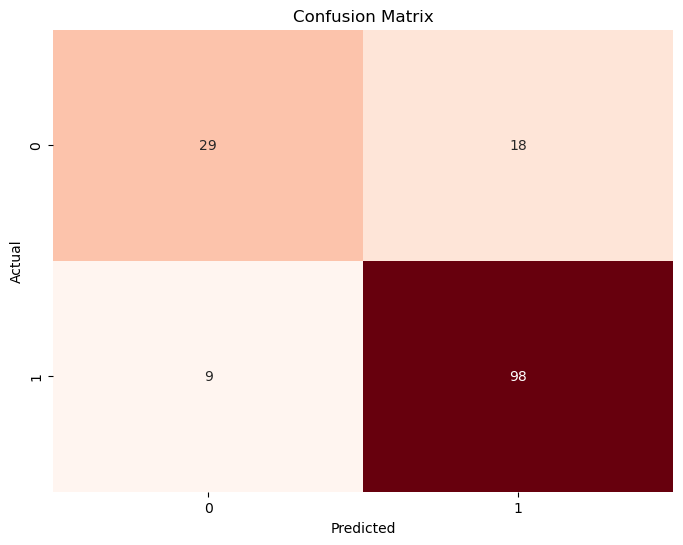

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

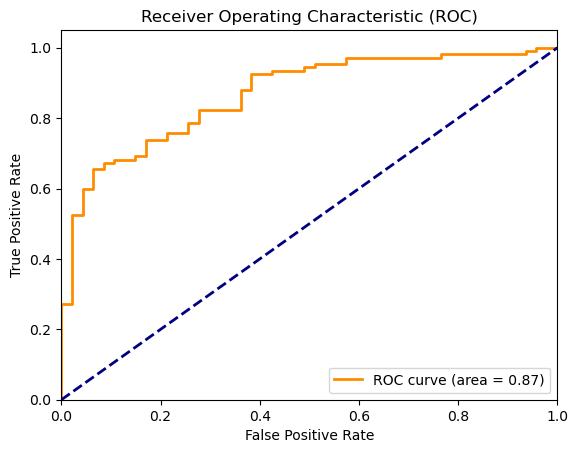

In [13]:
from sklearn.metrics import classification_report, roc_curve, auc

# Predict probabilities for the test set
y_prob = clf.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Training accuracy: 0.7654723127035831
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       107
           1       0.68      0.55      0.61        47

    accuracy                           0.79       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.78      0.79      0.78       154



/var/folders/dp/f1w59vsn4vqbvdmprd4rcvjw0000gn/T/ipykernel_92025/1906482412.py:47: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=x_scaled[y == cl, 0], y=x_scaled[y == cl, 1],


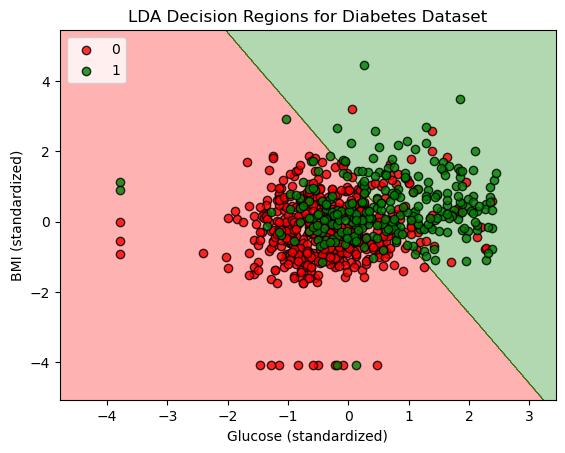

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap


# Select two features for simplicity
features = ['Glucose','BMI']
x = df[features]
y = df['Outcome']

# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

# Train the LDA model
clf = LinearDiscriminantAnalysis()
clf.fit(x_train, y_train)

# Evaluate the model
print(f"Training accuracy: {clf.score(x_train, y_train)}")
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

# Create a mesh grid for plotting decision regions
x_min, x_max = x_scaled[:, 0].min() - 1, x_scaled[:, 0].max() + 1
y_min, y_max = x_scaled[:, 1].min() - 1, x_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision regions
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green')))

# Plot the training points
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=x_scaled[y == cl, 0], y=x_scaled[y == cl, 1],
                alpha=0.8, c=ListedColormap(('red', 'green'))(idx),
                marker='o', label=cl, edgecolor='black')
plt.xlabel('Glucose (standardized)')
plt.ylabel('BMI (standardized)')
plt.legend(loc='upper left')
plt.title('LDA Decision Regions for Diabetes Dataset')
plt.show()
